# Practica 3

Un dataset de NOAA está almacenado en el archivo `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **id** : código de identificación de la estación
- **date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**, y las estaciones de donde provienen los datos se muestran en el siguiente mapa.

            ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106
            ID       Date Element  Data_Value
0  USW00094889 2014-11-12    TMAX          22
1  USC00208972 2009-04-29    TMIN          56
2  USC00200032 2008-05-26    TMAX         278
3  USC00205563 2005-11-11    TMAX         139
4  USC00200230 2014-02-27    TMAX        -106
Element  max_temp  min_temp
Date                       
01-01         156        72
01-02         139        28
01-03         133        28
01-04         106        44
01-05         128        94
Index(['max_temp', 'min_temp'], dtype='object', name='Element')


/tmp/ipykernel_2404/1984119471.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['Month-Day'] = df_2015['Date'].dt.strftime('%m-%d')


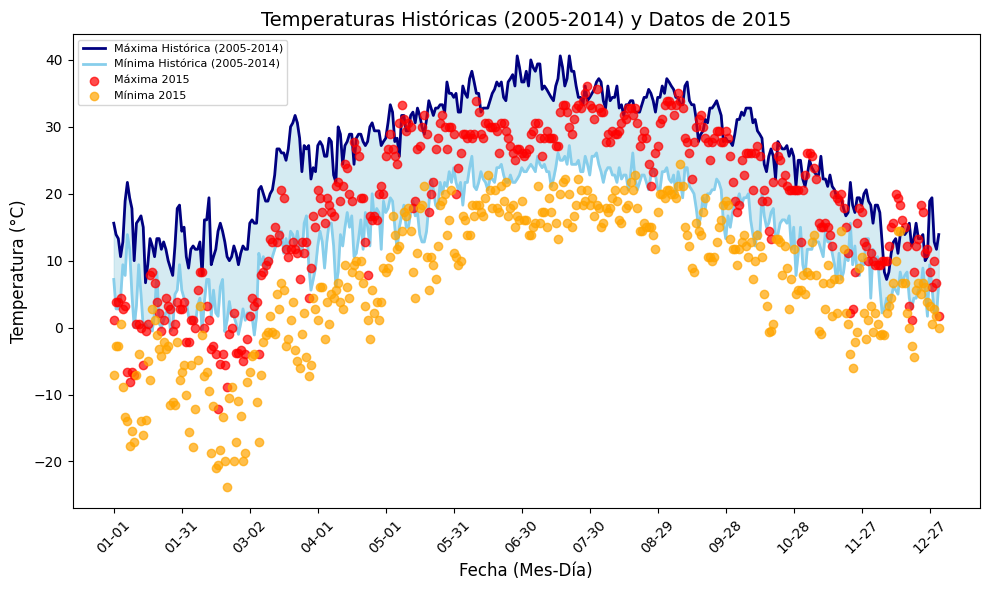

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Tu código a partir de aquí
import pandas as pd
import matplotlib.pyplot as plt

file_path = '../data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'
df = pd.read_csv(file_path)
print(df.head())


df['Date'] = pd.to_datetime(df['Date'])

# Filtro de datos para 2005-2014
df_filtered = df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)]
df_max_min = df_filtered[df_filtered['Element'].isin(['TMAX', 'TMIN'])]
print(df_max_min.head())

# Crear tabla para máximos y mínimos 
df_max_min_pivot = df_max_min.pivot_table(index=df_max_min['Date'].dt.strftime('%m-%d'),
                                          columns='Element',
                                          values='Data_Value', 
                                          aggfunc='max')
df_max_min_pivot.rename(columns={'TMAX': 'max_temp', 'TMIN': 'min_temp'}, inplace=True)
print(df_max_min_pivot.head())
print(df_max_min_pivot.columns)


# Excluir el 29 de febrero 
df_max_min_pivot = df_max_min_pivot[~(df_max_min_pivot.index == '02-29')]

# Filtrar datos de 2015
df_2015 = df[(df['Date'].dt.year == 2015) & (df['Element'].isin(['TMAX', 'TMIN']))]
df_2015['Month-Day'] = df_2015['Date'].dt.strftime('%m-%d')
df_2015_pivot = df_2015.pivot_table(index='Month-Day', columns='Element', values='Data_Value', aggfunc='max')
df_2015_pivot.rename(columns={'TMAX': 'max_temp', 'TMIN': 'min_temp'}, inplace=True)

# Identificar récords de 2015 
record_max = df_2015_pivot[df_2015_pivot['max_temp'] > df_max_min_pivot['max_temp']]
record_min = df_2015_pivot[df_2015_pivot['min_temp'] < df_max_min_pivot['min_temp']]

# Graficar las temperaturas máximas y mínimas 
plt.figure(figsize=(10, 6))
plt.plot(df_max_min_pivot.index, df_max_min_pivot['max_temp'] / 10, label='Máxima Histórica (2005-2014)', color='navy', lw=2)
plt.plot(df_max_min_pivot.index, df_max_min_pivot['min_temp'] / 10, label='Mínima Histórica (2005-2014)', color='skyblue', lw=2)

# Graficar los puntos del 2015
plt.scatter(df_2015_pivot.index, df_2015_pivot['max_temp'] / 10, color='red', label='Máxima 2015', zorder=5, alpha=0.7)
plt.scatter(df_2015_pivot.index, df_2015_pivot['min_temp'] / 10, color='orange', label='Mínima 2015', zorder=5, alpha=0.7)

# Gráfico
plt.fill_between(df_max_min_pivot.index, df_max_min_pivot['max_temp'] / 10, df_max_min_pivot['min_temp'] / 10, color='lightblue', alpha=0.5)
plt.title('Temperaturas Históricas (2005-2014) y Datos de 2015', fontsize=14)
plt.xlabel('Fecha (Mes-Día)', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)

# Mostrar solo las fechas del primer día de cada mes
xticks = df_max_min_pivot.index[::30]
plt.xticks(xticks, labels=xticks, rotation=45)

plt.legend(loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

